# Smile Training

In [ ]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [2]:
import cv2 as cv

def load_images(directory, limit):
    images = []

    for file in os.listdir(directory)[:limit]:
        image = cv.imread(os.path.join(directory, file), cv.COLOR_BGR2GRAY)

        images.append(image / 255)

    return images

negative_images = load_images("training/negative", 3690)
negative_labels = [[1, 0]] * len(negative_images)

positive_images = load_images("training/positive", 3690)
positive_labels = [[0, 1]] * len(negative_images)

assert len(negative_images) == len(positive_images)

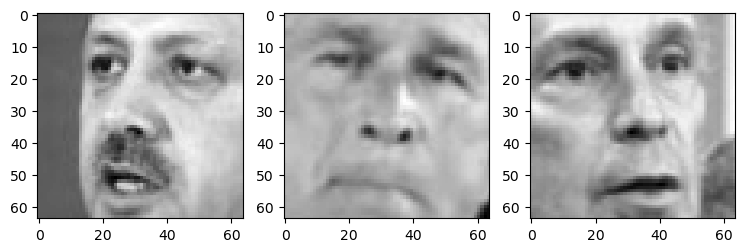

In [3]:
import matplotlib.pyplot as plt

def plot_images(images):
    _, axes = plt.subplots(figsize=(3 * len(images), 3), ncols=len(images), nrows=1)

    for axis, image in zip(axes, images):
      axis.imshow(image.reshape(64, 64), cmap="gray")

    plt.show()

plot_images(negative_images[42:45])

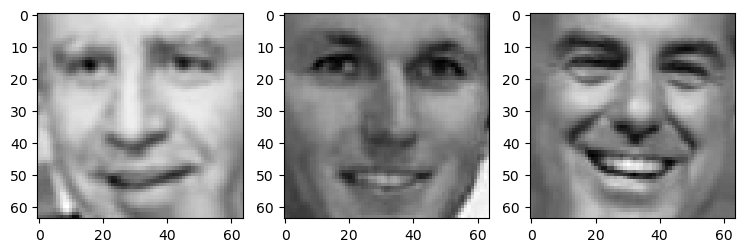

In [4]:
plot_images(positive_images[42:45])

In [5]:
import numpy as np

all_images = np.array(negative_images + positive_images)
all_labels = np.array(negative_labels + positive_labels)

In [6]:
import sklearn.model_selection

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    all_images,
    all_labels,
    random_state=42,
    stratify=negative_labels + positive_labels,
    test_size=0.20)

In [33]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input((64, 64, 1)))

model.add(tf.keras.layers.Conv2D(10, (5, 5), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))

model.add(tf.keras.layers.Conv2D(20, (5, 5), padding="same"))
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(150))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation("softmax"))

model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 10)     │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 64, 64, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 20)     │         5,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_37 (Activation)      │ (None, 16, 16, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 150)            │       192,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_38 (Activation)      │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           302 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_39 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,732 (772.39 KB)

 Trainable params: 197,732 (772.39 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=15, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5824 - loss: 0.6832 - val_accuracy: 0.7127 - val_loss: 0.5367
Epoch 2/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8006 - loss: 0.4403 - val_accuracy: 0.8333 - val_loss: 0.3631
Epoch 3/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8656 - loss: 0.3193 - val_accuracy: 0.8421 - val_loss: 0.3350
Epoch 4/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8760 - loss: 0.3001 - val_accuracy: 0.8530 - val_loss: 0.3151
Epoch 5/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8889 - loss: 0.2717 - val_accuracy: 0.8652 - val_loss: 0.3031
Epoch 6/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8934 - loss: 0.2685 - val_accuracy: 0.8638 - val_loss: 0.2990
Epoch 7/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8990 - loss: 0.2505 - val_accuracy: 0.8753 - val_loss: 0.2866
Epoch 8/15
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9071 - loss: 0.2330 - val_accuracy: 0.8747 - val_loss:

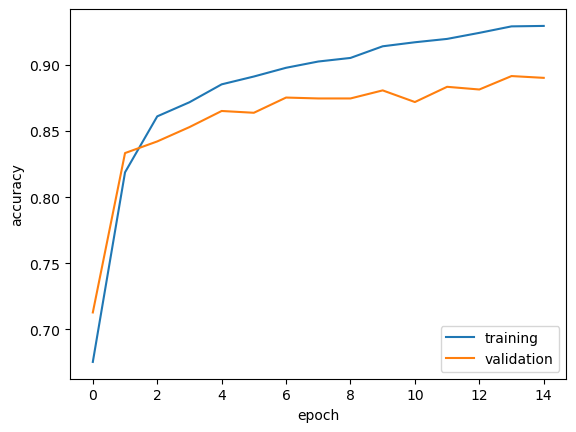

In [35]:
plt.plot(np.arange(0, 15), history.history["accuracy"], label="training")
plt.plot(np.arange(0, 15), history.history["val_accuracy"], label="validation")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(loc="lower right")
plt.show()

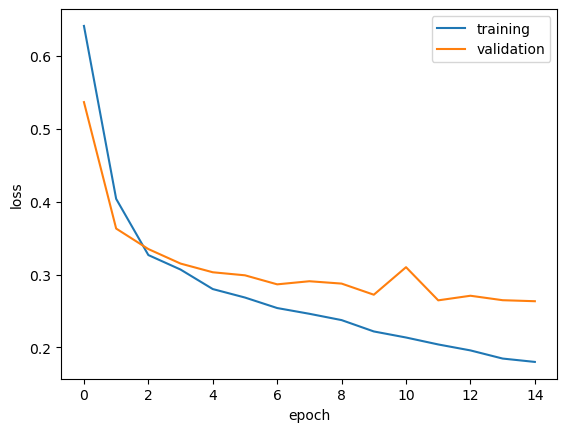

In [37]:
plt.plot(np.arange(0, 15), history.history["loss"], label="training")
plt.plot(np.arange(0, 15), history.history["val_loss"], label="validation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(loc="upper right")
plt.show()

In [38]:
model.save("smile.keras")